## Observations and Insights 

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import stats
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#review columns
print(mouse_metadata.columns)
print(study_results.columns)

# Combine the data into a single dataset
mouse_research_df = pd.merge(mouse_metadata, study_results, how ='outer', on='Mouse ID')


Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')
Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')


In [72]:
# Checking the number of mice in the DataFrame.
count_of_mice_meta = len(mouse_metadata["Mouse ID"].unique())
#of unique mice
#from mice metadata
print(count_of_mice_meta)
#from combined dataframe
count_of_mice_combined = len(mouse_research_df["Mouse ID"].unique())
print(count_of_mice_combined)

#total rows of mice from merged file
number_of_mice = mouse_research_df["Mouse ID"].count()
number_of_mice

249
249


1893

In [73]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_time = mouse_research_df.groupby(["Mouse ID","Timepoint"])
#review data by timepoint to see values - duplicate noted as there are only 249 mice
mouse_research_df["Timepoint"].value_counts()                                 
                                       

0     250
5     238
10    223
15    207
20    195
25    183
30    171
35    154
40    142
45    130
Name: Timepoint, dtype: int64

In [74]:
# Optional: Get all the data for the duplicate mouse ID. #found the "keep = false" setting later
DuplicateMouseData_df = mouse_research_df[mouse_research_df.duplicated(['Mouse ID', 'Timepoint'], keep = False)]
DuplicateMouseData_df

#confirm data is duplicated for mouse ID and Timepoint by review specifically that MouseID
#Mouse_g989 = mouse_research_df.loc[mouse_research_df["Mouse ID"] == "g989"]
#Mouse_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [75]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_research_df.sort_values('Timepoint', ascending=False)
CleanMouse_df = mouse_research_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
#reset index
CleanMouse_df.reset_index()
#ensure df renders properly
CleanMouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [76]:
# Checking the number of mice in the clean DataFrame.
CleanMouse_df["Mouse ID"].count()

1888

## Summary Statistics

In [77]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mouse_stats1 = CleanMouse_df.groupby(["Drug Regimen"])

median = mouse_stats1['Tumor Volume (mm3)'].median()
mean = mouse_stats1['Tumor Volume (mm3)'].mean()
variance = mouse_stats1['Tumor Volume (mm3)'].var()
stan_dev = mouse_stats1['Tumor Volume (mm3)'].std()
SEM = mouse_stats1['Tumor Volume (mm3)'].sem()


# This method is the most straightforward, creating multiple series and putting them all together at the end.
#create dataframe
mouse_stats1_df = pd.DataFrame({"Tumor Vol Median":median, "Tumor Vol Mean": mean, "Tumor Vol Variance":variance, "Tumor Vol Standard Deviation": stan_dev, "Tumor Vol SEM":SEM})

mouse_stats1_df

,Tumor Vol Median,Tumor Vol Mean,Tumor Vol Variance,Tumor Vol Standard Deviation,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,41.557809,40.675741,24.947764,4.994774,0.329346
Ceftamin,51.776157,52.591172,39.290177,6.268188,0.469821
Infubinol,51.820584,52.884795,43.128684,6.567243,0.492236
Ketapril,53.698743,55.235638,68.553577,8.279709,0.603860
Naftisol,52.509285,54.331565,66.173479,8.134708,0.596466
Placebo,52.288934,54.033581,61.168083,7.821003,0.581331
Propriva,50.909965,52.393463,43.138803,6.568014,0.525862
Ramicane,40.673236,40.216745,23.486704,4.846308,0.320955
Stelasyn,52.431737,54.233149,59.450562,7.710419,0.573111


In [78]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_stats2 = CleanMouse_df.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)" :['median', 'mean', 'var','std', 'sem']})
# This method produces everything in a single groupby function.
mouse_stats2

Tumor Volume (mm3)                                          
                         median       mean        var       std       sem
Drug Regimen                                                             
Capomulin             41.557809  40.675741  24.947764  4.994774  0.329346
Ceftamin              51.776157  52.591172  39.290177  6.268188  0.469821
Infubinol             51.820584  52.884795  43.128684  6.567243  0.492236
Ketapril              53.698743  55.235638  68.553577  8.279709  0.603860
Naftisol              52.509285  54.331565  66.173479  8.134708  0.596466
Placebo               52.288934  54.033581  61.168083  7.821003  0.581331
Propriva              50.909965  52.393463  43.138803  6.568014  0.525862
Ramicane              40.673236  40.216745  23.486704  4.846308  0.320955
Stelasyn              52.431737  54.233149  59.450562  7.710419  0.573111
Zoniferol             51.818479  53.236507  48.533355  6.966589  0.516398

## Bar Plots

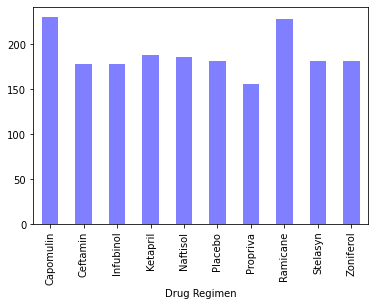

In [79]:
##These are the modified instructions from our instructor - Pandas
# Generate a bar plot that shows the number of total mice for each treatment regimen throughout the course of the study

x_axis = CleanMouse_df["Drug Regimen"]
countofmice = mouse_stats1['Mouse ID'].count()

Mouse_Chart = countofmice.plot(kind = 'bar', color ='b', alpha =0.5)


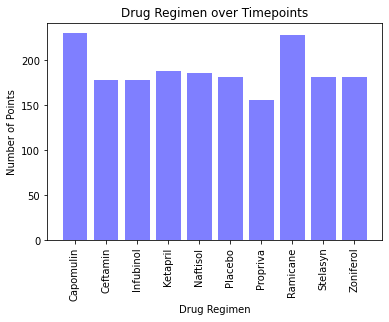

In [80]:
##These are the modified instructions from our instructor - Matplotlib
# Matplotlib's pyplot that shows the number of total mice for each treatment regimen throughout the course of the study.

x_axis2 = np.arange(0,len(mouse_stats1['Drug Regimen']))
x_value = CleanMouse_df['Drug Regimen'].unique()
sorted_xvalues = x_value.sort()
xticks = []

for drugname in x_value:
    xticks.append(drugname)

#create chart
plt.bar(x_value, countofmice, color = "b" , alpha =0.5, align= "center")

#Add labels and title
plt.title("Drug Regimen over Timepoints")
plt.ylabel("Number of Points")
plt.xlabel("Drug Regimen")
plt.xticks(x_value, xticks, rotation = 90)

#display chart
plt.show()



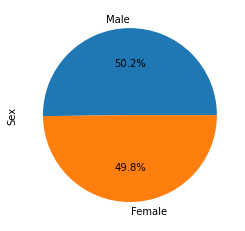

In [81]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

Mouse_Pie = mouse_metadata.Sex.value_counts().plot(kind = 'pie', autopct='%1.1f%%')

(-1.1199395799512024,
 1.1085163149757233,
 -1.1187480755433892,
 1.108793637086287)

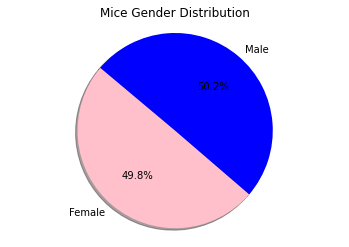

In [82]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#calculate number of female mice
femalemice = len(mouse_metadata.loc[mouse_metadata["Sex"] == "Female"])

#calculate number of male mice
malemice = len(mouse_metadata.loc[mouse_metadata["Sex"] == "Male"])


#set up pie specs
labels = ["Female", "Male"]
piesize = [femalemice, malemice]
colors = ["pink", "blue"]

#create pie
plt.pie(piesize, labels=labels, colors=colors, autopct="%1.1f%%", shadow = True, startangle=140)
plt.title("Mice Gender Distribution")
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [83]:
#From Clean dataframe, find last value for each mouse
#get last value
drug_df = CleanMouse_df.drop_duplicates(['Mouse ID'], keep="last")
drug_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [84]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the IQR and quantitatively determine if there are any potential outliers. 
Treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#___________________________Capomulin______________________________________________________
#From new drug_df find only Capomulin values
Capomulin_df = drug_df.loc[(drug_df['Drug Regimen'] == "Capomulin")]
Capomulin_TumorVol_df = Capomulin_df['Tumor Volume (mm3)']

#Calculate Capomulin Quartiles
CapomulinQuartiles = Capomulin_TumorVol_df.quantile([0.25, 0.5, 0.75]) 
CapomulinLowerQuart = CapomulinQuartiles[0.25]
CapomulinUpperQuart = CapomulinQuartiles[0.75]
print(f'Capomulin IQR for Tumor Volume = {CapomulinIQR}')
print(f'Capomulin Lower Quartile for Tumor Volume = {CapomulinLowerQuart}')
print(f'Capomulin Upper Quartile for Tumor Volume = {CapomulinUpperQuart}')

#Calculate Upper/ Lower Bounds
CapomulinIQR = CapomulinLowerQuart - CapomulinUpperQuart
CapomulinUpperBound = CapomulinUpperQuart + 1.5*CapomulinIQR
CapomulinLowerBound = CapomulinLowerQuart + 1.5*CapomulinIQR
print(f'Capomulin tumor values above Q3 = {CapomulinUpperBound} could be outliers')
print(f'Capomulin tumor values below Q1 = {CapomulinLowerBound} could be outliers')

#________________________Capomuline End__________________________________________________


Capomulin IQR for Tumor Volume = -7.781863460000004
Capomulin Lower Quartile for Tumor Volume = 32.37735684
Capomulin Upper Quartile for Tumor Volume = 40.1592203
Capomulin tumor values above Q3 = 28.486425109999995 could be outliers
Capomulin tumor values below Q1 = 20.70456164999999 could be outliers


In [85]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

In [86]:
#Define Funciton for IQR
#def IQRCalc('Drug Regimen'):


## Line and Scatter Plots

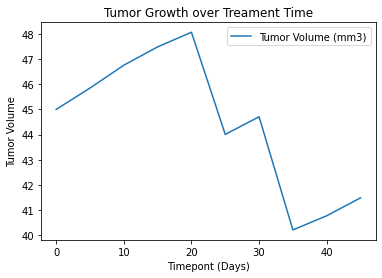

In [108]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Create Dataframe for single mouse-s185 treated with Capomulin Regimen
mouse_s185_df = CleanMouse_df.loc[CleanMouse_df['Mouse ID'] =='l509']

#Find time point and tumor volume
#s185_timepoints = mouse_s185_df["Timepoint"]
#s185_tumorvol = mouse_s185_df["Tumor Volume (mm3)"]
mouse_s185_df.plot.line("Timepoint", "Tumor Volume (mm3)")
plt.title("Tumor Growth over Treament Time")
plt.ylabel("Tumor Volume")
plt.xlabel("Timepont (Days)")
plt.show()

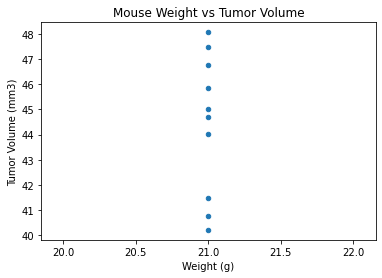

In [110]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_s185_df.plot.scatter("Weight (g)", "Tumor Volume (mm3)")
plt.title("Mouse Weight vs Tumor Volume")

#Average tumor volume for all mice???
plt.show()

#guess I didn't pick a very interesting mouse - had to double check the data to make sure its weight actually didn't cahnge over time.
#mouse_s185_df

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
